# Zindi:Computer Vision for Image Classification

Initial Code:
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
Parameter Tuning for GradientBoostingClassifier:
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [2]:
# Start
import pandas as pd
import matplotlib.pyplot as plt
images = pd.read_csv('train.csv')
images.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,123.0,152.0,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,226.0,110.0,9,0.0,0.0,0.333333,0.088889,0.500000,0.211111,1.666667,0.111111,4.444445,0.444444,-4.666666,8.333333,-3.666667,4.444445,0.977778,-2.155984,1
2,121.0,60.0,9,0.0,0.0,2.277778,2.329629,2.888889,2.874074,26.740740,24.666666,35.222220,20.333334,-6.222222,25.444445,-19.222221,35.222220,0.422300,-1.776113,2
3,96.0,84.0,9,0.0,0.0,1.500000,1.277777,1.611111,2.285188,23.851852,23.555555,30.000000,18.000000,-0.888889,18.444445,-17.555555,30.000000,0.398791,-1.598867,2
4,103.0,64.0,9,0.0,0.0,0.666667,0.699205,1.333331,0.918936,108.777780,96.333336,126.222220,103.777780,-37.333332,52.333332,-15.000000,126.222220,0.236797,-2.355443,3


In [3]:
print(images.shape)

(210, 20)


In [4]:
print(images['CLASS'].unique())

[0 1 2 3 4 5 6]


In [5]:
print(images.groupby('CLASS').size())

CLASS
0    30
1    30
2    30
3    30
4    30
5    30
6    30
dtype: int64


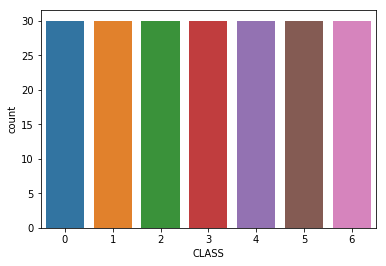

In [6]:
import seaborn as sns
sns.countplot(images['CLASS'],label="Count")
plt.show()

In [7]:
print (images.describe())

       REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
count           210.000000           210.000000               210.0   
mean            124.647619           122.757143                 9.0   
std              74.104024            58.139686                 0.0   
min               1.000000            11.000000                 9.0   
25%              60.500000            81.500000                 9.0   
50%             123.500000           121.500000                 9.0   
75%             189.750000           174.500000                 9.0   
max             252.000000           250.000000                 9.0   

       SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN    VEDGE-SD  \
count            210.000000            210.000000  210.000000  210.000000   
mean               0.008466              0.006349    1.925132    5.719529   
std                0.029549              0.030077    3.158211   43.495942   
min                0.000000              0.000000   

In [8]:
feature_names = list(images.columns.values)
feature_names.remove('CLASS')
feature_names.remove('REGION-PIXEL-COUNT')
X = images[feature_names]
y = images['CLASS']
print(feature_names)


['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


### Create Training and Test Sets and Apply Scaling

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Test Out Different methods

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.87
Accuracy of Logistic regression classifier on test set: 0.87


C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.96


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,  leaf_size=20, p=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.96


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.91
Accuracy of LDA classifier on test set: 0.89


C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.70


In [169]:
from sklearn.svm import SVC
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.93
Accuracy of SVM classifier on test set: 0.87


In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=130,learning_rate=0.01,max_depth=5, random_state=0,
                                 min_samples_leaf= 3, min_samples_split= 10,
                                  max_features = 'sqrt' ,subsample = 0.8).fit(X_train, y_train)
print('Accuracy of GBC classifier on training set: {:.4f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of GBC classifier on test set: {:.4f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of GBC classifier on training set: 1.0000
Accuracy of GBC classifier on test set: 0.9623


In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01,max_depth=5,random_state=0,loss='ls').fit(X_train, y_train)
print('Accuracy of GBr classifier on training set: {:.2f}'
     .format(gbr.score(X_train, y_train)))
print('Accuracy of GBr classifier on test set: {:.2f}'
     .format(gbr.score(X_test, y_test)))

Accuracy of GBr classifier on training set: 1.00
Accuracy of GBr classifier on test set: 0.69


Accuracy of RFR classifier on training set: 1.00
Accuracy of RFR classifier on test set: 0.69


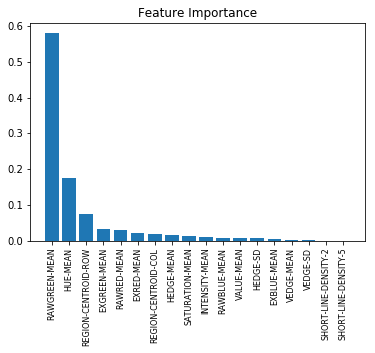

In [147]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=1500,min_samples_leaf=8, n_jobs=-1, random_state=0 ).fit(X_train, y_train)
print('Accuracy of RFR classifier on training set: {:.2f}'
     .format(gbr.score(X_train, y_train)))
print('Accuracy of RFR classifier on test set: {:.2f}'
     .format(gbr.score(X_test, y_test)))

import numpy as np
import matplotlib.pyplot as plt

# Calculate feature importances
importances = RFR.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

GradientBoostingClassifier is looking the best. I tuned the parameters a bit.

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate   #Additional scklearn functions

#param_test1 = {'n_estimators':range(20,160,10)}
#param_test1 = {'max_depth':range(2,10,1), 'min_samples_split':range(2,20,2)}
param_test1 = {'min_samples_split':range(10,1000,200), 'min_samples_leaf':range(3,71,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators=130,learning_rate=0.01, random_state=0,
                                                               max_features = 'sqrt' ,subsample = 0.8,max_depth=5), 
param_grid = param_test1,n_jobs=4,iid=False, cv=5,return_train_score=True)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.43657718, 0.62564201, 0.55168419, 0.54548783, 0.54548759,
         0.88389406, 0.54608693, 0.55168409, 0.54468789, 0.54408798,
         0.7211874 , 0.54848585, 0.54448819, 0.5458868 , 0.55208373,
         0.64303169, 0.54688621, 0.54368863, 0.54868574, 0.55408239,
         0.64503059, 0.64942784, 0.65362568, 0.55628114, 0.54548783,
         0.54868579, 0.55408244, 0.54488783, 0.54508753, 0.54468784,
         0.5434886 , 0.54648695, 0.54888568, 0.55668116, 0.52390327]),
  'std_fit_time': array([0.02108378, 0.02572253, 0.01688982, 0.00738224, 0.00556107,
         0.00676725, 0.00837579, 0.00596326, 0.00948158, 0.00402761,
         0.00754816, 0.00858314, 0.00499328, 0.00721771, 0.0116142 ,
         0.01285522, 0.00883556, 0.00561791, 0.01001427, 0.00655666,
         0.02568798, 0.04682328, 0.03369766, 0.01121086, 0.00248034,
         0.0068373 , 0.00371815, 0.00627032, 0.00542302, 0.00414457,
         0.0041162 , 0.00594304, 0.00563255, 0.01023155, 0.05631051]

In [176]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gbc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5 0 1 0 0 0 1]
 [0 9 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         9
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       0.83      1.00      0.91         5

   micro avg       0.96      0.96      0.96        53
   macro avg       0.96      0.96      0.95        53
weighted avg       0.97      0.96      0.96        53



### Now to appply the model to the data for submission

In [177]:
trained_model=gbc.fit(X_train, y_train)
images_sub = pd.read_csv('test.csv')
X_sub = images_sub[feature_names]
X_sub = scaler.transform(X_sub)
result_matrix=trained_model.predict(X_sub)
y_sub=images_sub['id']
trained_model.predict_proba(X_sub)

array([[0.21214161, 0.19746166, 0.30564304, ..., 0.06974365, 0.06904711,
        0.07643997],
       [0.06675605, 0.09901627, 0.06246527, ..., 0.48117776, 0.06007708,
        0.17161752],
       [0.03004994, 0.02536965, 0.02967072, ..., 0.02776488, 0.02391394,
        0.03819913],
       ...,
       [0.0330843 , 0.02517632, 0.02488484, ..., 0.02596187, 0.02569253,
        0.05649999],
       [0.03642565, 0.03126121, 0.02614367, ..., 0.02549057, 0.81793242,
        0.03738532],
       [0.02487643, 0.02462755, 0.02480054, ..., 0.8437803 , 0.02467343,
        0.0324544 ]])

In [178]:
Submission=pd.DataFrame(trained_model.predict_proba(X_sub))
#Submission=Submission.assign(id=y_sub)
Submission.columns=["CLASS_0","CLASS_1","CLASS_2","CLASS_3","CLASS_4","CLASS_5","CLASS_6"]
Submission.head()
Submission.to_csv('solution2a.csv')